<a href="https://colab.research.google.com/github/ihyaulumuddin044/ML_Portofolio/blob/main/fish_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('fish_data.csv')
df.head()

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31


In [4]:
df.shape

(4080, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB


In [8]:
data = df.copy()
X = data[['length', 'weight', 'w_l_ratio']]
y = data['species']

print(X)
print(y)

      length  weight  w_l_ratio
0      10.66    3.45       0.32
1       6.91    3.27       0.47
2       8.38    3.46       0.41
3       7.57    3.36       0.44
4      10.83    3.38       0.31
...      ...     ...        ...
4075   30.56    6.12       0.20
4076   29.66    6.11       0.21
4077   32.81    6.25       0.19
4078   29.78    6.11       0.21
4079   31.62    6.14       0.19

[4080 rows x 3 columns]
0          Anabas testudineus
1          Anabas testudineus
2          Anabas testudineus
3          Anabas testudineus
4          Anabas testudineus
                ...          
4075    Sillaginopsis panijus
4076    Sillaginopsis panijus
4077    Sillaginopsis panijus
4078    Sillaginopsis panijus
4079    Sillaginopsis panijus
Name: species, Length: 4080, dtype: object


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3264, 3)
(816, 3)
(3264,)
(816,)


In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# convesiolan method

In [21]:
df_scelar = StandardScaler()
X_train_scelar = df_scelar.fit_transform(X_train)
X_test_scelar = df_scelar.transform(X_test)

In [22]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scelar, y_train)
y_pred_rf = model_rf.predict(X_test_scelar)
print(classification_report(y_test, y_pred_rf))

                        precision    recall  f1-score   support

    Anabas testudineus       1.00      1.00      1.00       120
     Coilia dussumieri       1.00      1.00      1.00        77
Otolithoides biauritus       0.68      0.70      0.69        91
     Otolithoides pama       1.00      1.00      1.00        86
     Pethia conchonius       1.00      1.00      1.00        89
  Polynemus paradiseus       1.00      1.00      1.00       102
  Puntius lateristriga       1.00      1.00      1.00        65
        Setipinna taty       0.72      0.70      0.71       100
 Sillaginopsis panijus       1.00      1.00      1.00        86

              accuracy                           0.93       816
             macro avg       0.93      0.93      0.93       816
          weighted avg       0.93      0.93      0.93       816



# using PipeLine

In [27]:
from math import pi
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

pipeline_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC()),
])

pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])
pipeline_rf.fit(X_train, y_train)
pipeline_svc.fit(X_train, y_train)
pipeline_knn.fit(X_train, y_train)

y_pred_rf = pipeline_rf.predict(X_test)
y_pred_svc = pipeline_svc.predict(X_test)
y_pred_knn = pipeline_knn.predict(X_test)


print("RandomForestClassifier:")
print(classification_report(y_test, y_pred_rf))

print("\nSVC:")
print(classification_report(y_test, y_pred_svc))

print("\nKNeighborsClassifier:")
print(classification_report(y_test, y_pred_knn))

RandomForestClassifier:
                        precision    recall  f1-score   support

    Anabas testudineus       1.00      1.00      1.00       120
     Coilia dussumieri       1.00      1.00      1.00        77
Otolithoides biauritus       0.68      0.74      0.71        91
     Otolithoides pama       1.00      1.00      1.00        86
     Pethia conchonius       1.00      1.00      1.00        89
  Polynemus paradiseus       1.00      1.00      1.00       102
  Puntius lateristriga       1.00      1.00      1.00        65
        Setipinna taty       0.74      0.69      0.72       100
 Sillaginopsis panijus       1.00      1.00      1.00        86

              accuracy                           0.93       816
             macro avg       0.94      0.94      0.94       816
          weighted avg       0.93      0.93      0.93       816


SVC:
                        precision    recall  f1-score   support

    Anabas testudineus       1.00      1.00      1.00       120
     C

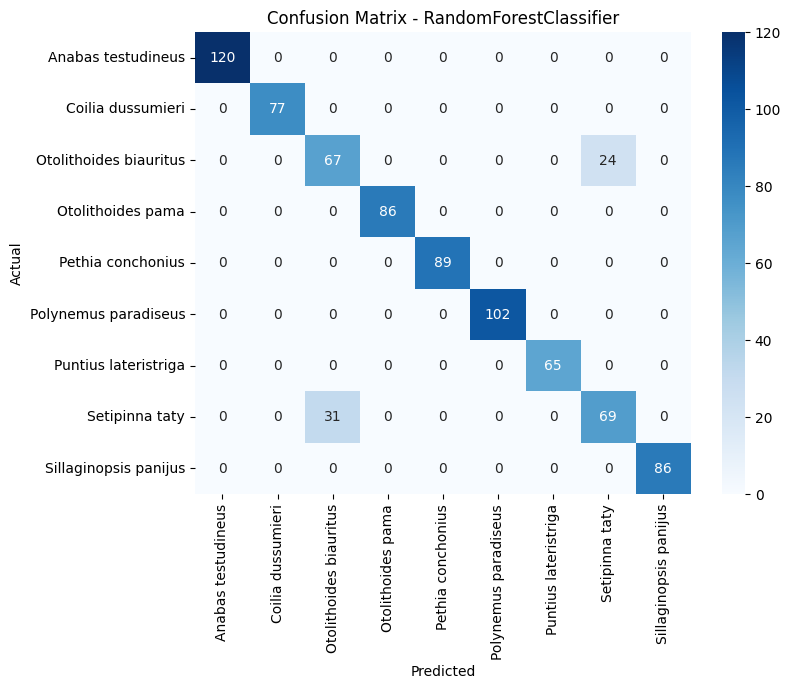

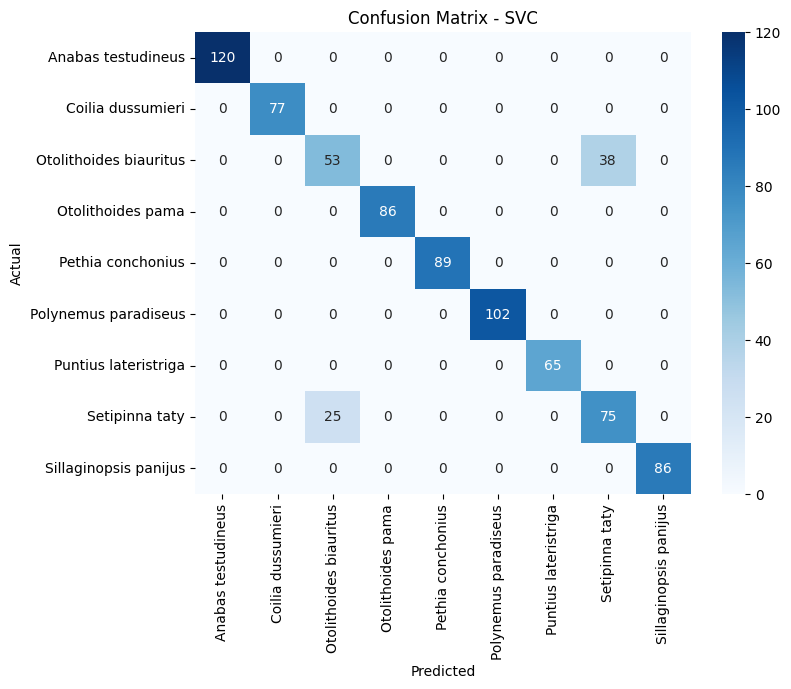

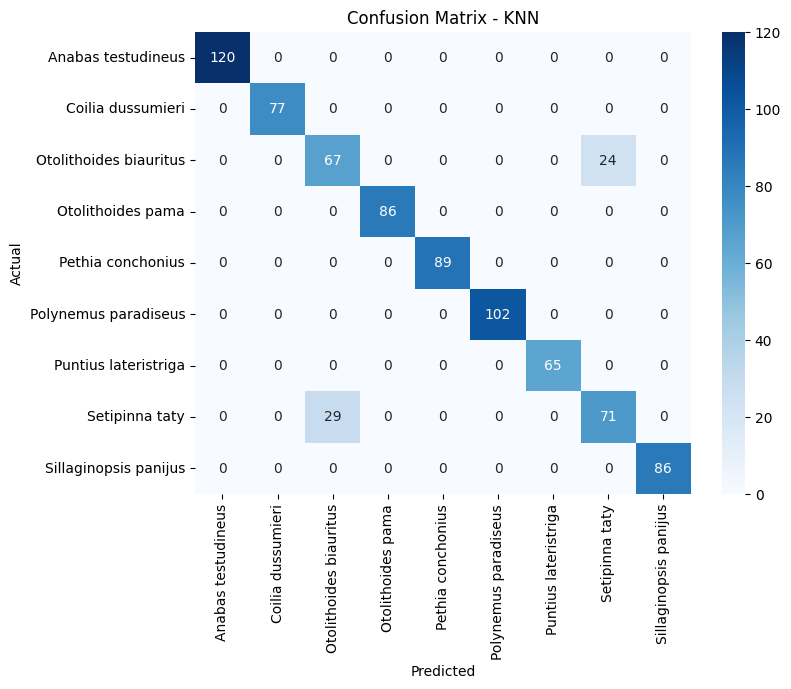

In [30]:
from sklearn.metrics import confusion_matrix

# RandomForestClassifier Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - RandomForestClassifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# SVC Confusion Matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - SVC")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
